<a href="https://colab.research.google.com/github/soyab266/test/blob/master/TRAIN_TEST_SPLIT_WITH_LR_ion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.figure import Figure
from sklearn import linear_model


from sklearn.metrics import r2_score
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.io as pio
pio.renderers.default = 'colab'
from plotly.offline import init_notebook_mode, iplot

In [3]:
path= "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv"

In [4]:
df=pd.read_csv(path)


In [5]:
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [6]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [7]:
cdf=df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(3)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136


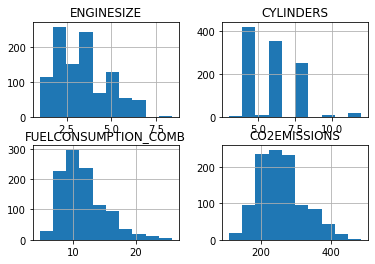

In [8]:
cdf.hist()
plt.show()

Text(0, 0.5, 'CO2EMISSIONS')

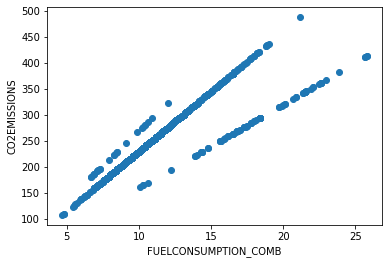

In [9]:
plt.scatter(cdf.FUELCONSUMPTION_COMB,cdf.CO2EMISSIONS)
plt.xlabel('FUELCONSUMPTION_COMB')
plt.ylabel('CO2EMISSIONS')

SCATTER PLOT

Text(0, 0.5, 'CO2EMISSIONS')

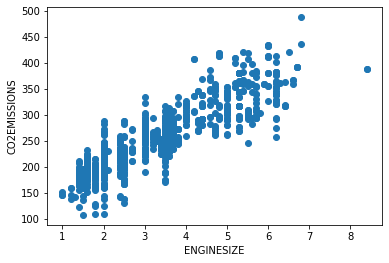

In [10]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS)
plt.xlabel('ENGINESIZE')
plt.ylabel('CO2EMISSIONS')

In [ ]:
len('df')

2

Let's split our dataset into train and test sets. 80% of the entire dataset will be used for training and 20% for testing. We create a mask to select random rows using np.random.rand() function:

In [11]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

In [15]:
len(train)

861

In [16]:
len(test)

206

Text(0, 0.5, 'CO2EMISSIONS')

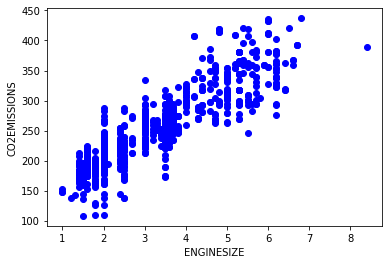

In [20]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color= 'blue')
plt.xlabel('ENGINESIZE')
plt.ylabel('CO2EMISSIONS')

In [26]:
from numpy.ma.core import asanyarray
from numpy.ma.core import asanyarray

lr=linear_model.LinearRegression()
x_train=np.asanyarray(train[['ENGINESIZE']])
y_train=np.asanyarray(train[['CO2EMISSIONS']])
lr.fit(x_train,y_train)
print(lr.coef_)
print(lr.intercept_)

[[39.17800409]]
[125.23202418]


Text(0, 0.5, 'CO2EMISSIONS')

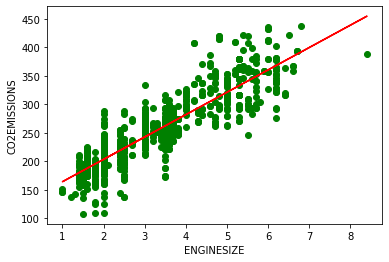

In [38]:
plt.scatter(train.ENGINESIZE,train.CO2EMISSIONS,color='green')
plt.plot(x_train,lr.coef_* x_train +lr.intercept_,color='red')# yhat=theta0 + theta 1* x1
plt.xlabel('ENGINESIZE')
plt.ylabel('CO2EMISSIONS')

yhat=theta (0)+ theta (1)*x1//////
 theta(0)= intercept /////
 theta(1)= coef

We compare the actual values and predicted values to calculate the accuracy of a regression model. Evaluation metrics provide a key role in the development of a model, as it provides insight to areas that require improvement.

There are different model evaluation metrics, lets use MSE here to calculate the accuracy of our model based on the test set:

In [49]:
x_test=np.asanyarray(test[['ENGINESIZE']])
y_test=np.asanyarray(test[['CO2EMISSIONS']])
# lr.fit(x_test,y_test)
y_test1= lr.predict(x_test)

In [51]:
print("Mean absolute error: %.2f" % np.mean(np.absolute(y_test1 - y_test)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_test1 - y_test) ** 2))
print("R2-score: %.2f" % r2_score(y_test , y_test1) )

Mean absolute error: 24.77
Residual sum of squares (MSE): 1010.78
R2-score: 0.75


In [55]:
x_train=np.asanyarray(train[['FUELCONSUMPTION_COMB']])
y_train=np.asanyarray(train[['CO2EMISSIONS']])
x_test=np.asanyarray(test[['FUELCONSUMPTION_COMB']])
y_test=np.asanyarray(test[['CO2EMISSIONS']])

In [61]:
lr.fit(x_train, y_train)

LinearRegression()

In [62]:
y_test2=lr.predict(x_test)

In [ ]:
y_test2

In [66]:
print("Mean absolute error: %.2f" % np.mean(np.absolute(y_test2 - y_test1)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_test2 - y_test1) ** 2))
print("R2-score: %.2f" % r2_score(y_test1 , y_test2) )

Mean absolute error: 25.62
Residual sum of squares (MSE): 1234.00
R2-score: 0.60
